In [1]:
from load_auto import load_auto
from main_functions import *

In [2]:
# global variables
num_iterations = 1000
learning_rates = [1, 1e-1, 1e-2, 1e-3, 1e-4]

### Implementation on all features

In [3]:
X_train, X_train_normalized, Y_train = load_auto()

#### Implementation on normalized features

In [4]:
print(X_train_normalized.shape)

(392, 7)


In [5]:
total_costs = []
for i in learning_rates:
    weights, b, cost_list,iterations = train_linear_model(X_train_normalized, Y_train, num_iterations, i)
    total_costs.append(cost_list)

The cost for iteration 0 is 610.4738265306122
The cost for iteration 200 is inf
The cost for iteration 400 is nan
The cost for iteration 600 is nan
The cost for iteration 800 is nan
The cost for iteration 999 is nan
The cost for iteration 0 is 610.4738265306122
The cost for iteration 200 is 10.880920893395123
The cost for iteration 400 is 10.849335523674572
The cost for iteration 600 is 10.847602334859872
The cost for iteration 800 is 10.847489084705014
The cost for iteration 999 is 10.847481499970431
The cost for iteration 0 is 610.4738265306122
The cost for iteration 200 is 12.01777949102011
The cost for iteration 400 is 11.451304226860376
The cost for iteration 600 is 11.237669452195465
The cost for iteration 800 is 11.108992624449682
The cost for iteration 999 is 11.02751327099357
The cost for iteration 0 is 610.4738265306122
The cost for iteration 200 is 262.7488763526763
The cost for iteration 400 is 124.55010750699861


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/Arins/Documents/Uni/Deep Learning for Image Analysis/Assignments/Assignment 1/Linear-Reg-Gradient-Descent-From-Scratch-In-NumPy/main_functions.py:18: RuntimeWarning: overflow encountered in square
  loss = (real_values - predicted_values) ** 2


The cost for iteration 600 is 62.795497016046745
The cost for iteration 800 is 34.97472765319183
The cost for iteration 999 is 22.450005771266934
The cost for iteration 0 is 610.4738265306122
The cost for iteration 200 is 554.4254571248918
The cost for iteration 400 is 505.8078403635487
The cost for iteration 600 is 463.08684793850546
The cost for iteration 800 is 425.1429293199706
The cost for iteration 999 is 391.30911896975357


In [6]:
# for each cost list in total_cost print the last cost
for i in range(len(total_costs)):
    print(f"Learning rate: {learning_rates[i]}")
    print(f"Final cost: {total_costs[i][-1]}")
    print("\n")

Learning rate: 1
Final cost: nan


Learning rate: 0.1
Final cost: 10.847481499970431


Learning rate: 0.01
Final cost: 11.02751327099357


Learning rate: 0.001
Final cost: 22.450005771266934


Learning rate: 0.0001
Final cost: 391.30911896975357




In [8]:
print(total_costs)

[[610.4738265306122, inf, nan, nan, nan, nan], [610.4738265306122, 10.880920893395123, 10.849335523674572, 10.847602334859872, 10.847489084705014, 10.847481499970431], [610.4738265306122, 12.01777949102011, 11.451304226860376, 11.237669452195465, 11.108992624449682, 11.02751327099357], [610.4738265306122, 262.7488763526763, 124.55010750699861, 62.795497016046745, 34.97472765319183, 22.450005771266934], [610.4738265306122, 554.4254571248918, 505.8078403635487, 463.08684793850546, 425.1429293199706, 391.30911896975357]]


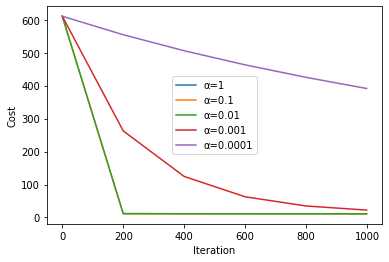

In [7]:
show_plot(total_costs, learning_rates)   